In [1]:
from splinx.spline import *
import jax.numpy as jnp
from jax import config

In [2]:
config.update('jax_platform_name', 'cpu')

(2, 11)


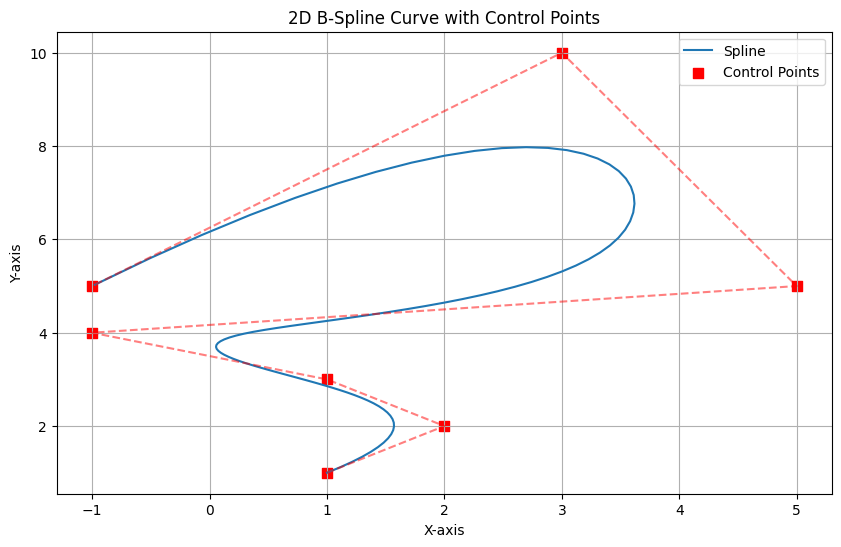

In [10]:
num_sample = 100
k = 3
x_eval = jnp.repeat(jnp.linspace(-1, .999, num_sample)[None, :], 2, axis=0)

coef = jnp.array([[1,2,1,-1,5,3,-1],
                  [1,2,3,4,5,10,5]])
num_grid_interval = coef.shape[1] - k
grids = jnp.einsum('i,j->ij', jnp.ones(2,), jnp.linspace(-1,1,num_grid_interval+1))
extended_grids = extend_grid(grids, k, clamp=True)

print(extended_grids.shape)

# Multiply the coeficients by the different basis functions
y_eval = coef2curve(x_eval, extended_grids, coef, k=k)

plt.figure(figsize=(10, 6))
plt.plot(y_eval[0, :], y_eval[1, :], label='Spline')

# Extract control points for each spline
# Here, extended_grids would represent the x positions of control points if it aligns with the spline's domain
ctrl_points_x = coef[0, :]  # You might need to adjust this based on your extend_grid function
ctrl_points_y = coef[1, :]

# Plot control points
plt.scatter(ctrl_points_x, ctrl_points_y, marker='s', s=50, color='red', label="Control Points")  # Red circles for control points
# Optionally connect control points with lines to better visualize the influence
plt.plot(ctrl_points_x, ctrl_points_y, 'r--', alpha=0.5)  # Dashed lines connecting control points

plt.title('2D B-Spline Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
jnp.repeat(grids[:, :1], k, axis=1)